In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, IBMQ, Aer
import numpy as np
#from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit.visualization import *

# Deutsch-Jozsa Algorithm

We will represent our function $f(x)$ as an oracle.

### Constant Oracle

First, we will construct our constant oracle where $f(x) = 0$ or $f(x) = 1$.
The constant oracle guarantees that our output will always be zero.

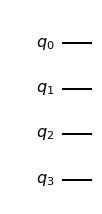

In [2]:
#We need n+1 qubits, n input qubits and one output
n = 3
c_oracle = QuantumCircuit(n+1)

#Randomly set output to be 0 or 1
out = np.random.randint(2)
if out == 1:
    c_oracle.x(n)
c_oracle.draw('mpl')

### Balanced Oracle

Now we will create our balanced oracle where $f(x) = 0$ for half of the inputs and $f(x) = 1$ for the other half. 
Using the phase kickback method, half of our states will have a negative phase.
The balanced oracle ensures that our output will always be one.

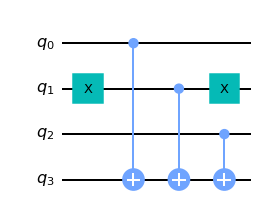

In [3]:
b_oracle = QuantumCircuit(n+1)

#Choose any binary string of length n to use as a key for X-gate placement
bin_str = "010"

#Place X-gate if cooresponding binary string is "1"
for qubit in range(len(bin_str)):
    if bin_str[qubit] == '1':
        b_oracle.x(qubit)
        
#Add CNOT gates using input qubit as control and output as target
for qubit in range(n):
    b_oracle.cx(qubit,n)

#Finish wrapping the controls in X-gates
for qubit in range(len(bin_str)):
    if bin_str[qubit] == '1':
        b_oracle.x(qubit)

b_oracle.draw('mpl')

### Test

Now we are ready to implement the Deutsch algorithm.
First, we will test using a balanced function.

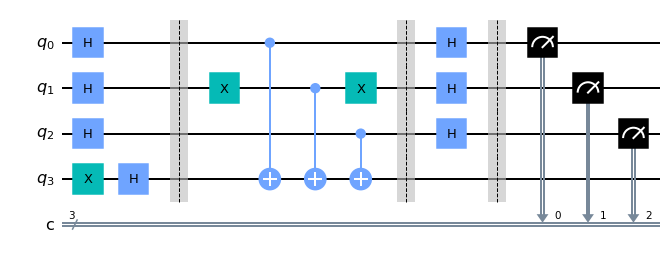

In [4]:
circ = QuantumCircuit(n+1,n)

#Initialize input qubits in state |+>
for qubit in range(n):
    circ.h(qubit)
    
#Initialize the output qubits in state |->
circ.x(n)
circ.h(n)

circ.barrier()

#Put through the balanced oracle
circ = circ.compose(b_oracle)

circ.barrier()

#Apply Hadamard gates to the n-input qubits
for qubit in range(n):
    circ.h(qubit)
    
circ.barrier()

#Now we can measure
for i in range(n):
    circ.measure(i,i)
    
circ.draw('mpl')

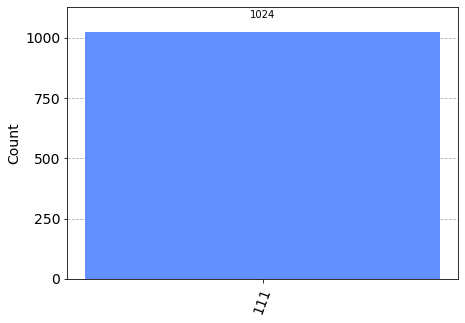

In [5]:
sim = Aer.get_backend('aer_simulator')
results = sim.run(circ).result()
answer = results.get_counts()
plot_histogram(answer)

We see that our result is all 1's.
This means that our function is balanced.
<br>
Now let's assume that we have a constant function.

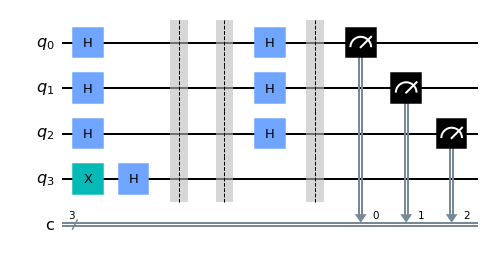

In [6]:
circ = QuantumCircuit(n+1,n)

for qubit in range(n):
    circ.h(qubit)
    
circ.x(n)
circ.h(n)

circ.barrier()

#Put through the constant oracle
circ = circ.compose(c_oracle)

circ.barrier()

for qubit in range(n):
    circ.h(qubit)
    
circ.barrier()

for i in range(n):
    circ.measure(i,i)
    
circ.draw('mpl')

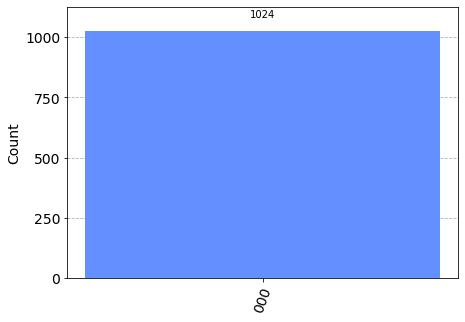

In [7]:
results = sim.run(circ).result()
answer = results.get_counts()
plot_histogram(answer)

Since we have measured all 0's, the algorithm has correctly predicted the function to be constant.